## Load necessary modules

In [1]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf

def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.Session(config=config)

# use this environment flag to change which GPU to use
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# set the modified tf session as backend in keras
keras.backend.tensorflow_backend.set_session(get_session())

Using TensorFlow backend.


## Load RetinaNet model

Trained models mode can [Download here](https://www.dropbox.com/sh/dsj1wby8c5yhgsp/AAC1yWzaF-XZ0gS5ae2pYqKAa?dl=0)

In [2]:

model_path = "examples/resnet152_rdd_19_best8140_infer.h5"

# load retinanet model
model = models.load_model(model_path, backbone_name='resnet152')

#print(model.summary())

# load label to names mapping for visualization purposes
labels_to_names = { 0:'D00',
    1:'D01',
    2:'D10',
    3:'D11',
    4:'D20',
    5:'D40',
    6:'D43',
    7:'D44',
    8:'D30'}

/home/laha/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


## Organize dataset

You can download the datase from [here](https://www.dropbox.com/s/zwd309g4u4derfi/road_damage_dataset.zip?dl=0)

If you have the original dataset please organize the dataset like above by moving images into one folder and 
annotations in another folder and then copy `data_index/trainset.cvs` and `testset.cvs` into root folder of the dataset.
Therefore, the folder organize as follow:
<img src="images/folder.jpg">

In [3]:
import pandas as pd

In [4]:
test_df = pd.read_csv("/media/sf_Download/road_damage_dataset/testset.csv")

In [5]:
test_df.head(10)

Unnamed: 0               file
0           0  test_Adachi_00203
1           1  test_Adachi_00217
2           2  test_Adachi_00001
3           3  test_Adachi_00015
4           4  test_Adachi_00029
5           5  test_Adachi_00175
6           6  test_Adachi_00161
7           7  test_Adachi_00149
8           8  test_Adachi_00148
9           9  test_Adachi_00160

## Run detection on example

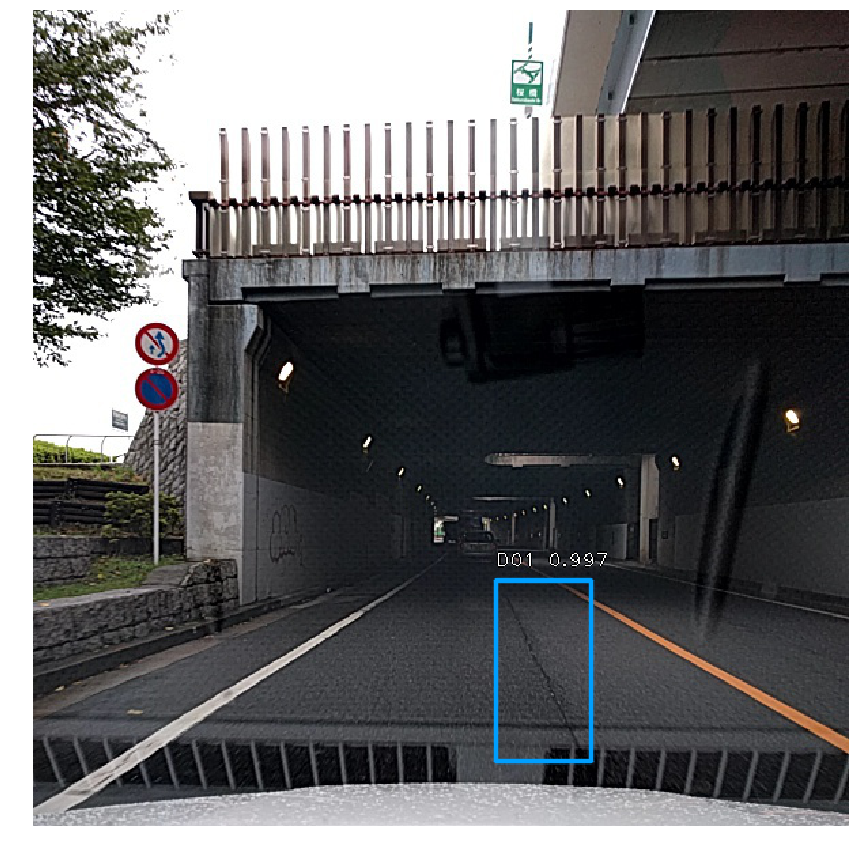

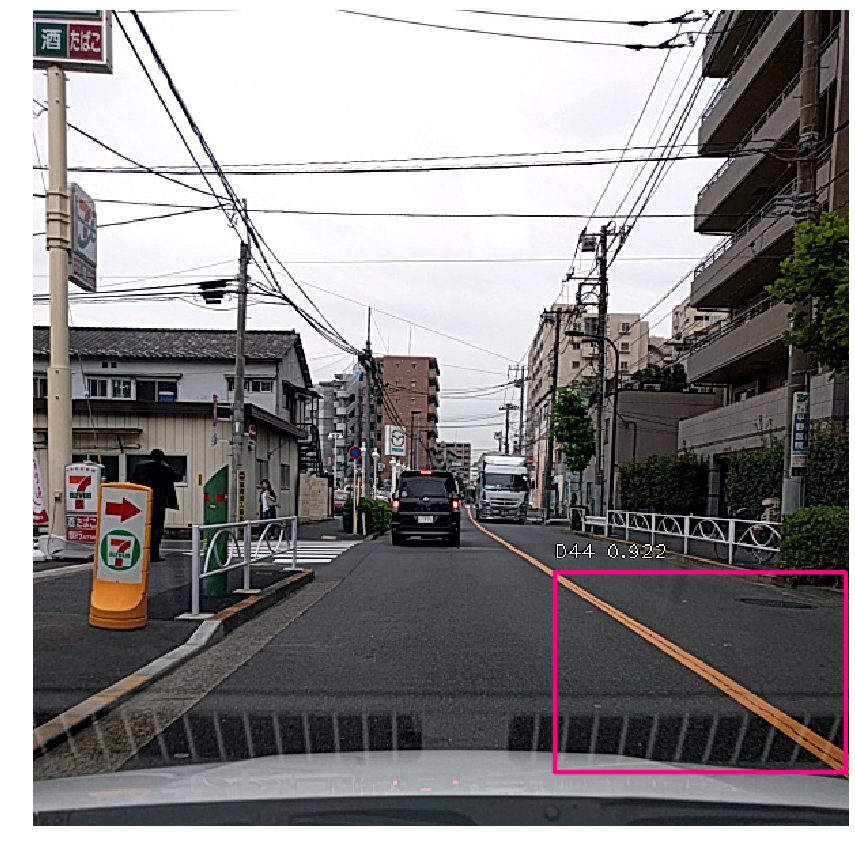

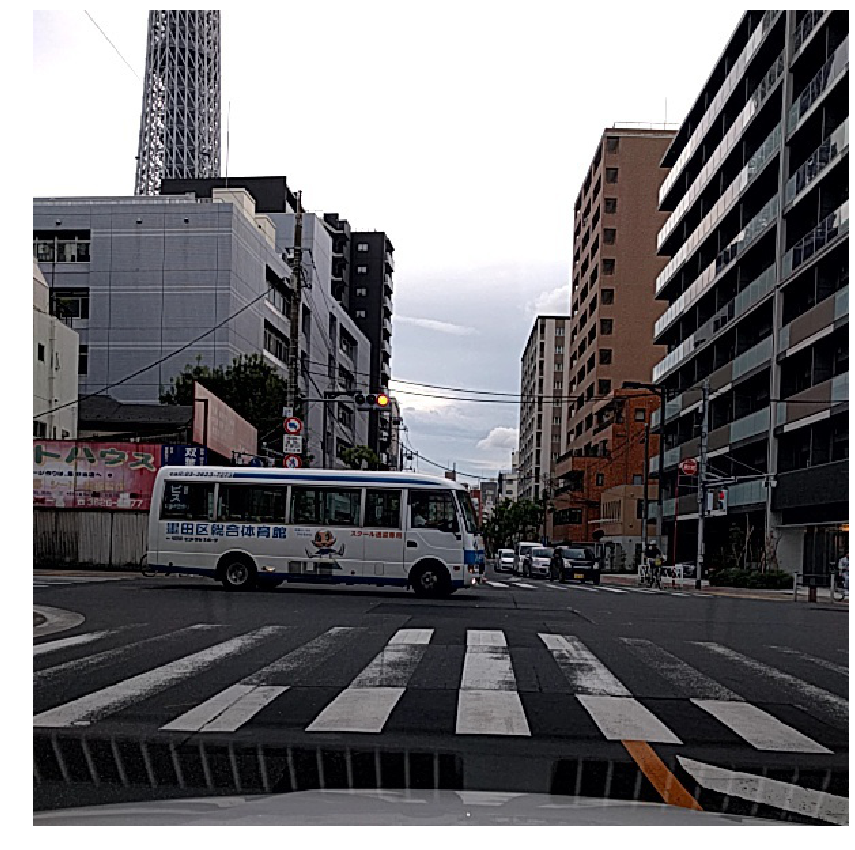

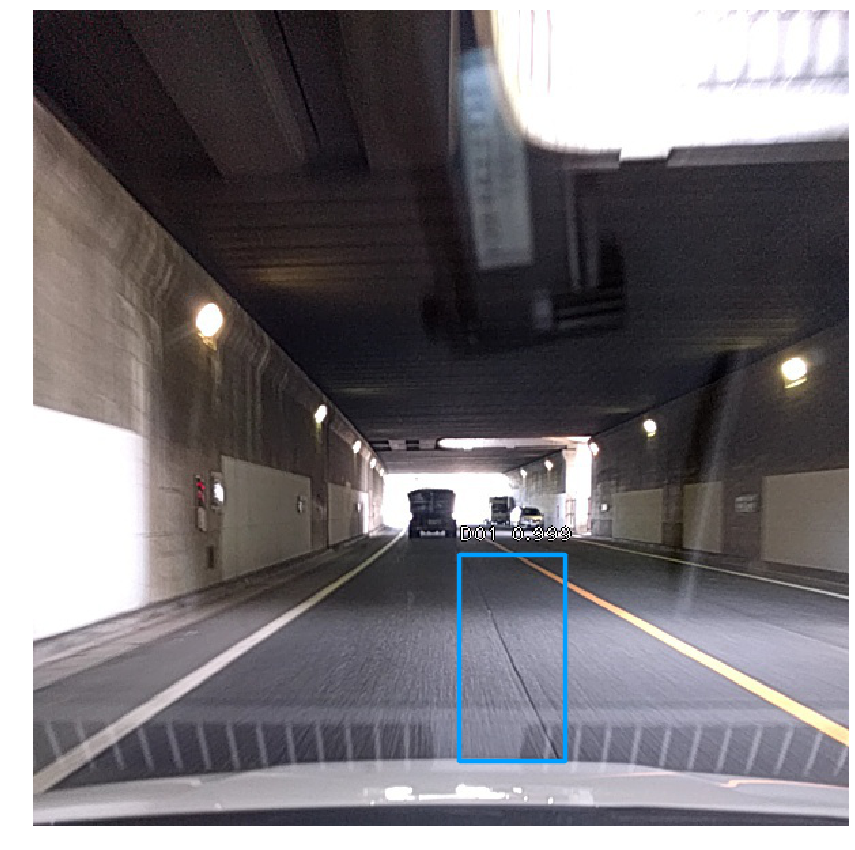

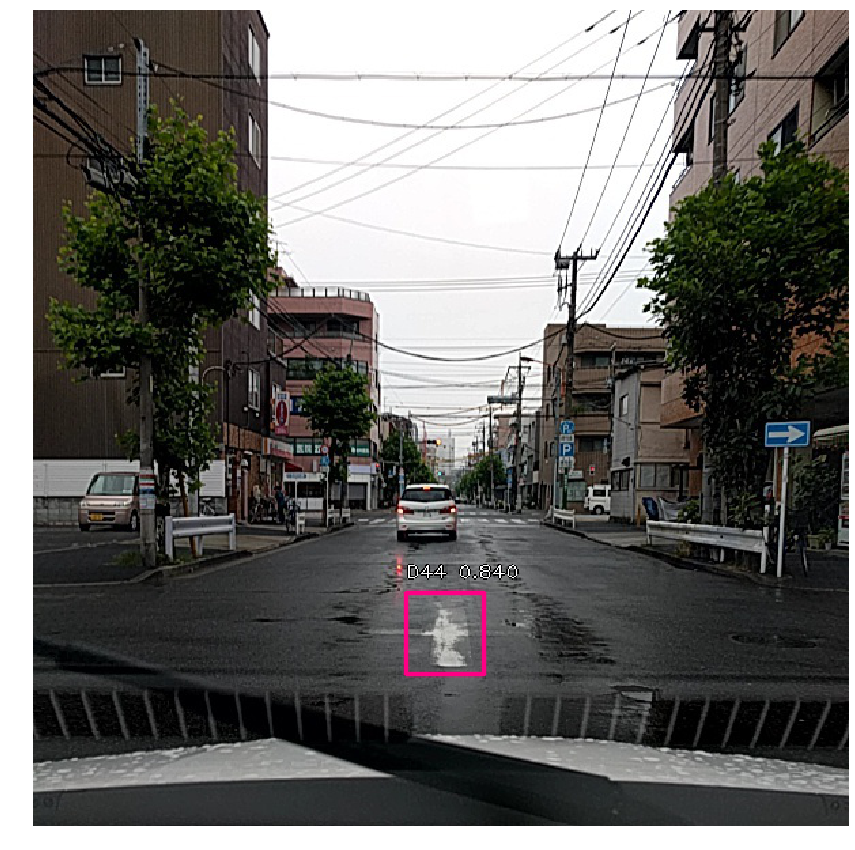

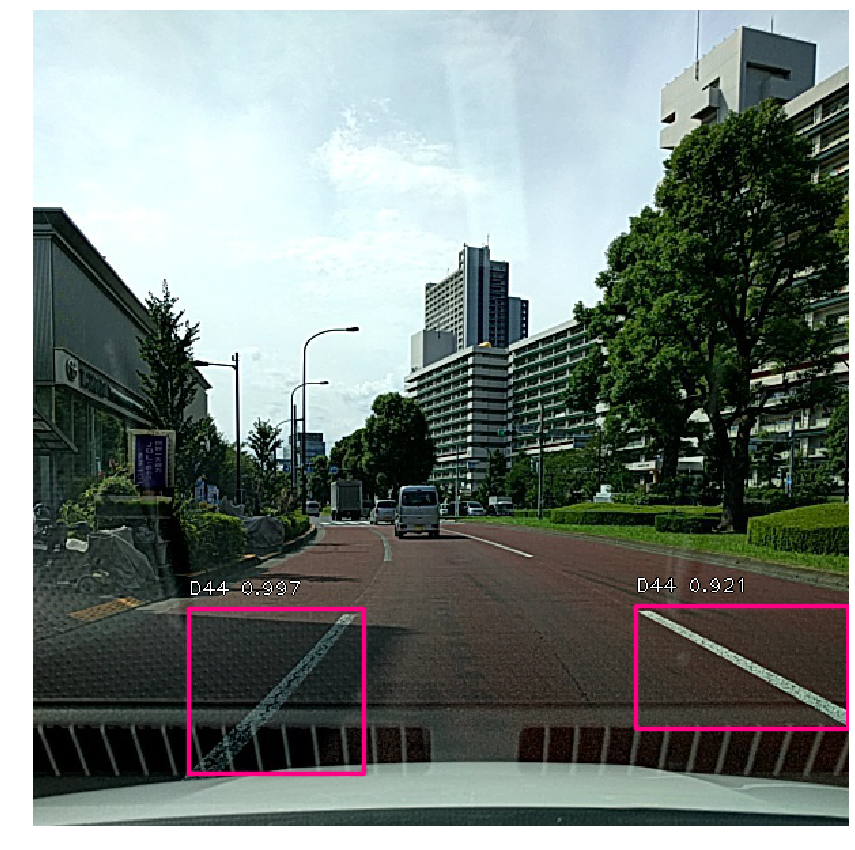

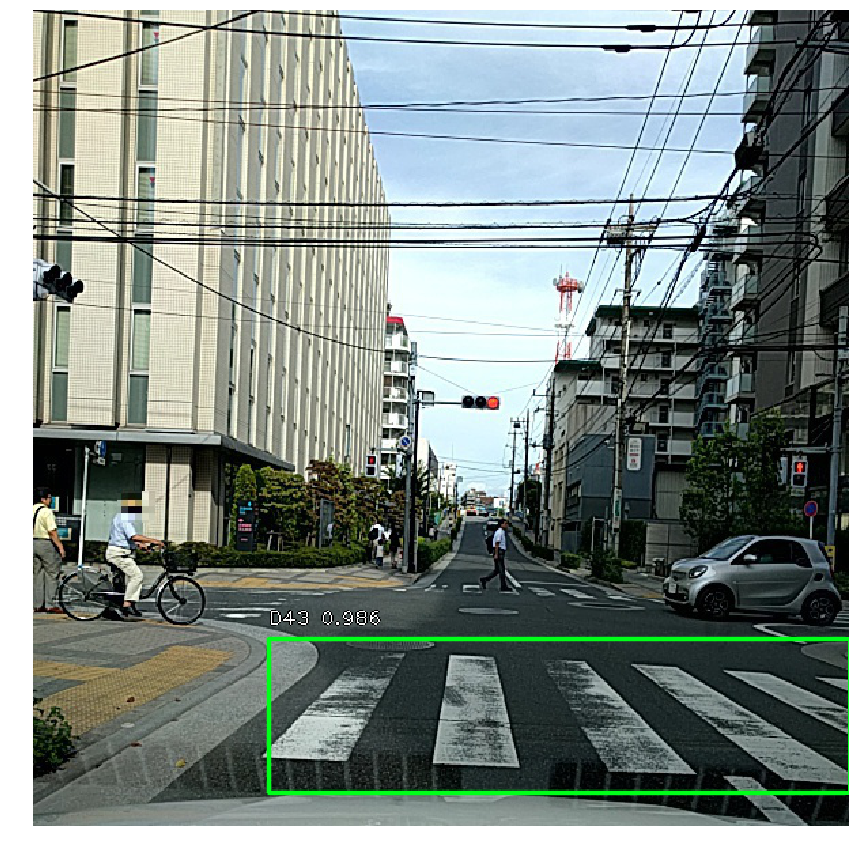

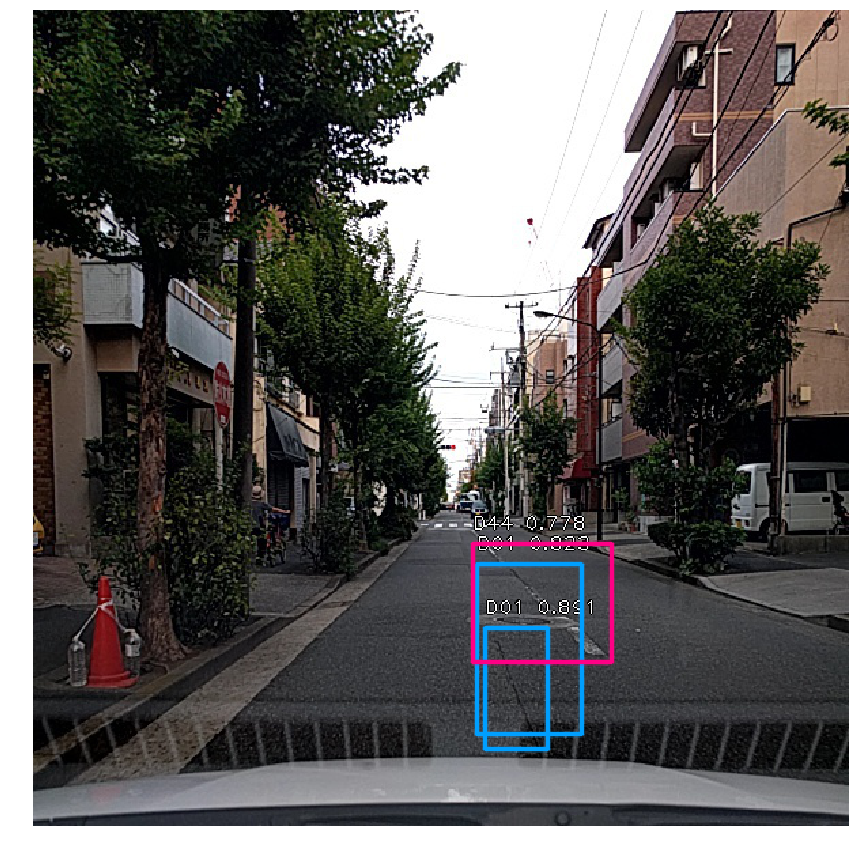

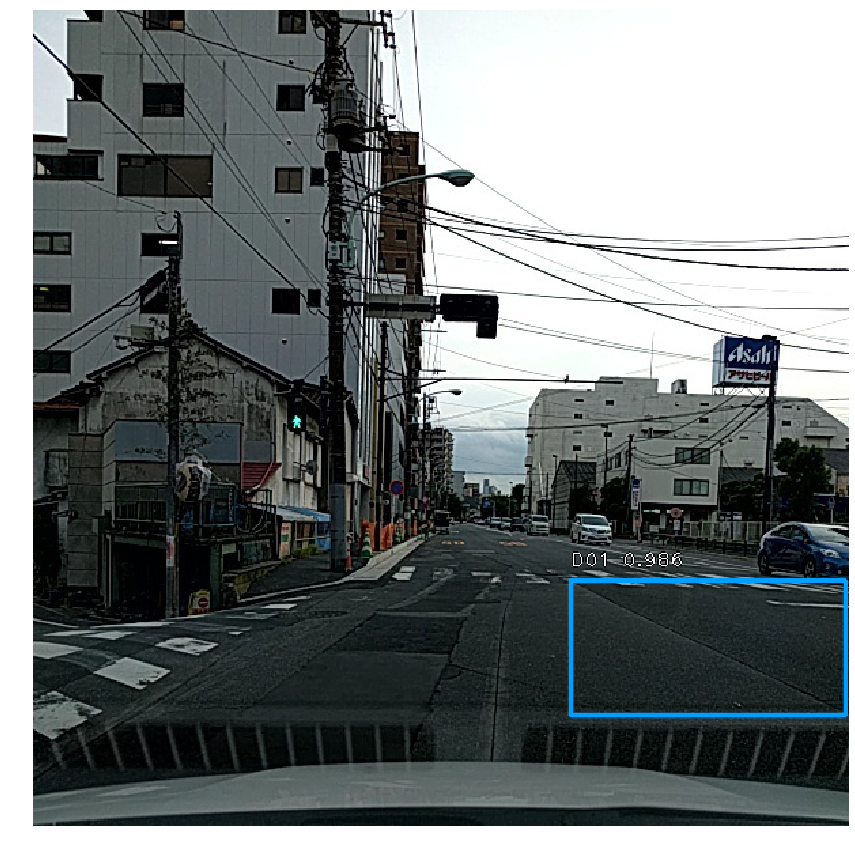

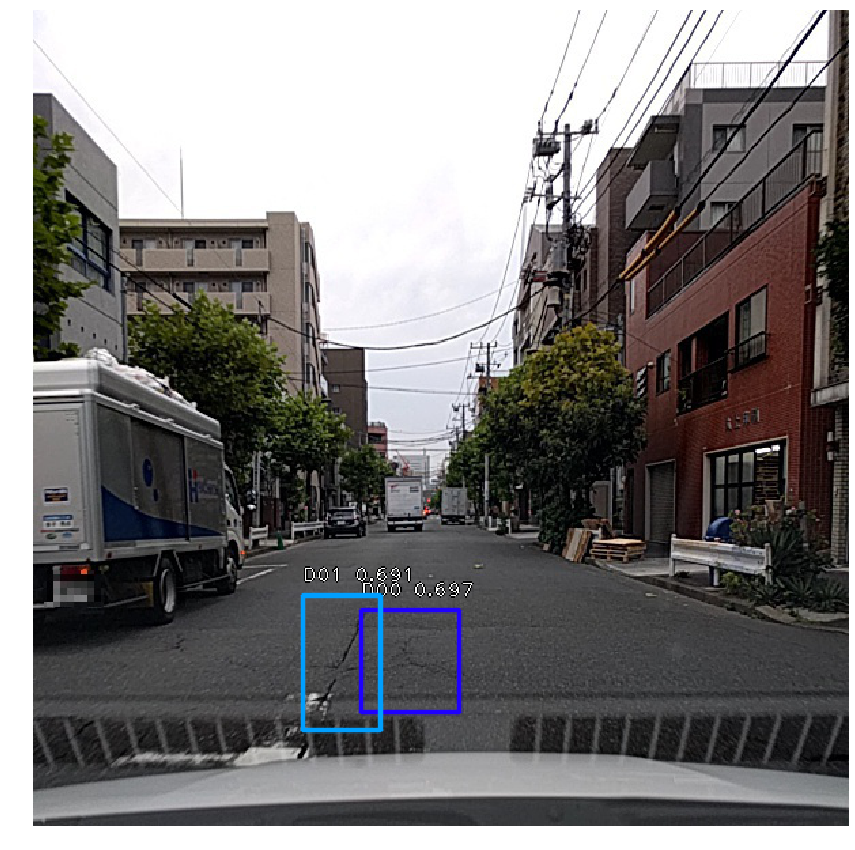

In [6]:

for img in list(test_df.file.tail(10)):
# load image
    image = read_image_bgr('/media/sf_Download/road_damage_dataset/ImageSets/{}.jpg'.format(img))

    # copy to draw on
    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

    # preprocess image for network
    image = preprocess_image(image)
    image, scale = resize_image(image)
    boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))


    # correct for image scale
    boxes /= scale

    # visualize detections
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        # scores are sorted so we can break
        if score >= 0.5:
            color = label_color(label)
            b = box.astype(int)
            draw_box(draw, b, color=color)
            caption = "{} {:.3f}".format(labels_to_names[label], score)
            draw_caption(draw, b, caption)

    plt.figure(figsize=(15, 15))
    plt.axis('off')
    plt.imshow(draw)
plt.show()